In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
from datetime import timedelta

sns.set(rc = {'figure.figsize':(15,10)})

In [4]:
#read csv + info
hour_drive = pd.read_csv('hour_drive.csv')
hour_drive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52011 entries, 0 to 52010
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      52011 non-null  int64  
 1   timestamp (ms)  52011 non-null  int64  
 2   acc_x           52011 non-null  int64  
 3   acc_y           52011 non-null  int64  
 4   acc_z           52011 non-null  int64  
 5   gyro_x          52011 non-null  float64
 6   gyro_y          52011 non-null  float64
 7   gyro_z          52011 non-null  float64
 8   Speed(Km/h)     52011 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 3.6 MB


In [5]:
#drop column
hour_drive = hour_drive.drop(columns = ['Unnamed: 0'])

In [6]:
#convert ms into s in new column
hour_drive['seconds'] = hour_drive['timestamp (ms)'] * 0.001
hour_drive

,timestamp (ms),acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,Speed(Km/h),seconds
0,2019518,0,-64,-64,2.019,0.155,3.584,0.0,2019.518
1,2019530,-64,64,96,2.019,0.155,3.584,0.0,2019.530
2,2019542,256,32,-224,2.019,0.155,3.584,0.0,2019.542
3,2019555,-64,0,320,2.019,0.155,3.584,0.0,2019.555
4,2019567,64,128,0,2.019,0.155,3.584,0.0,2019.567
...,...,...,...,...,...,...,...,...,...
52006,4038485,-13216,-2176,416,-0.095,-0.015,0.061,13.6,4038.485
52007,4038498,5408,-352,-10624,-0.095,-0.015,0.061,13.6,4038.498
52008,4038510,5568,-480,-2912,-0.095,-0.015,0.061,13.6,4038.510
52009,4038523,2368,1216,7168,-0.095,-0.015,0.061,13.6,4038.523


In [7]:
#create a clock from the s column
start_time = pd.to_datetime('30/3/2022 18:10:00')
new_datetime = start_time + pd.to_timedelta(hour_drive['seconds'], unit = 's')
hour_drive['Clock'] = new_datetime
hour_drive

,timestamp (ms),acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,Speed(Km/h),seconds,Clock
0,2019518,0,-64,-64,2.019,0.155,3.584,0.0,2019.518,2022-03-30 18:43:39.518
1,2019530,-64,64,96,2.019,0.155,3.584,0.0,2019.530,2022-03-30 18:43:39.530
2,2019542,256,32,-224,2.019,0.155,3.584,0.0,2019.542,2022-03-30 18:43:39.542
3,2019555,-64,0,320,2.019,0.155,3.584,0.0,2019.555,2022-03-30 18:43:39.555
4,2019567,64,128,0,2.019,0.155,3.584,0.0,2019.567,2022-03-30 18:43:39.567
...,...,...,...,...,...,...,...,...,...,...
52006,4038485,-13216,-2176,416,-0.095,-0.015,0.061,13.6,4038.485,2022-03-30 19:17:18.485
52007,4038498,5408,-352,-10624,-0.095,-0.015,0.061,13.6,4038.498,2022-03-30 19:17:18.498
52008,4038510,5568,-480,-2912,-0.095,-0.015,0.061,13.6,4038.510,2022-03-30 19:17:18.510
52009,4038523,2368,1216,7168,-0.095,-0.015,0.061,13.6,4038.523,2022-03-30 19:17:18.523


In [8]:
hour_drive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52011 entries, 0 to 52010
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp (ms)  52011 non-null  int64         
 1   acc_x           52011 non-null  int64         
 2   acc_y           52011 non-null  int64         
 3   acc_z           52011 non-null  int64         
 4   gyro_x          52011 non-null  float64       
 5   gyro_y          52011 non-null  float64       
 6   gyro_z          52011 non-null  float64       
 7   Speed(Km/h)     52011 non-null  float64       
 8   seconds         52011 non-null  float64       
 9   Clock           52011 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(4)
memory usage: 4.0 MB


In [9]:
#get rid of date
hour_drive['Clock'] = new_datetime.dt.strftime('%H:%M:%S:%f')

In [10]:
hour_drive.head(100)

,timestamp (ms),acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,Speed(Km/h),seconds,Clock
0,2019518,0,-64,-64,2.019,0.155,3.584,0.0,2019.518,18:43:39:518000
1,2019530,-64,64,96,2.019,0.155,3.584,0.0,2019.530,18:43:39:530000
2,2019542,256,32,-224,2.019,0.155,3.584,0.0,2019.542,18:43:39:542000
3,2019555,-64,0,320,2.019,0.155,3.584,0.0,2019.555,18:43:39:555000
4,2019567,64,128,0,2.019,0.155,3.584,0.0,2019.567,18:43:39:567000
...,...,...,...,...,...,...,...,...,...,...
95,2020699,-128,160,-256,2.019,0.155,3.584,0.0,2020.699,18:43:40:699000
96,2020712,160,160,-32,2.019,0.155,3.584,0.0,2020.712,18:43:40:712000
97,2020724,160,224,96,2.019,0.155,3.584,0.0,2020.724,18:43:40:724000
98,2020736,-96,32,-160,2.019,0.155,3.584,0.0,2020.736,18:43:40:736000


In [11]:
#filter with rolling average 50 ---> looked more consistent with filtered data provided by zoomo // we could change
hour_drive['SMA50AX'] = hour_drive['acc_x'].rolling(50).mean()
hour_drive['SMA50AY'] = hour_drive['acc_y'].rolling(50).mean()
hour_drive['SMA50AZ'] = hour_drive['acc_z'].rolling(50).mean()
hour_drive['SMA50GX'] = hour_drive['gyro_x'].rolling(50).mean()
hour_drive['SMA50GY'] = hour_drive['gyro_y'].rolling(50).mean()
hour_drive['SMA50GZ'] = hour_drive['gyro_z'].rolling(50).mean()

In [ ]:
#hour_drive.drop(columns = ['SMA200AX', 'SMA200AY', 'SMA200AZ', 'SMA200GX', 'SMA200GY', 'SMA200GZ'], inplace = True)

In [12]:
#look at min of all columns
print(hour_drive['SMA50AX'].min())
print(hour_drive['SMA50AY'].min())
print(hour_drive['SMA50AZ'].min())
print(hour_drive['SMA50GX'].min())
print(hour_drive['SMA50GY'].min()) 
print(hour_drive['SMA50GZ'].min()) 

-1551.36
-851.2
-1977.6
-43.817001
-7.402
-80.455002


In [13]:
#look at max for all columns
print(hour_drive['SMA50AX'].max())
print(hour_drive['SMA50AY'].max())
print(hour_drive['SMA50AZ'].max())
print(hour_drive['SMA50GX'].max())
print(hour_drive['SMA50GY'].max()) 
print(hour_drive['SMA50GZ'].max()) 

1999.36
876.8
1639.68
15.391000000000002
9.203
37.088001


In [12]:
#calculate amag
hour_drive['AMAG'] = (hour_drive['SMA50AX']**2 + hour_drive['SMA50AY']**2 + hour_drive['SMA50AZ']**2)**0.5
hour_drive['AMAG']

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
52006    890.511418
52007    800.669927
52008    684.971642
52009    595.388873
52010    572.436980
Name: AMAG, Length: 52011, dtype: float64

In [13]:
print(hour_drive['AMAG'].max())

2283.053764062511


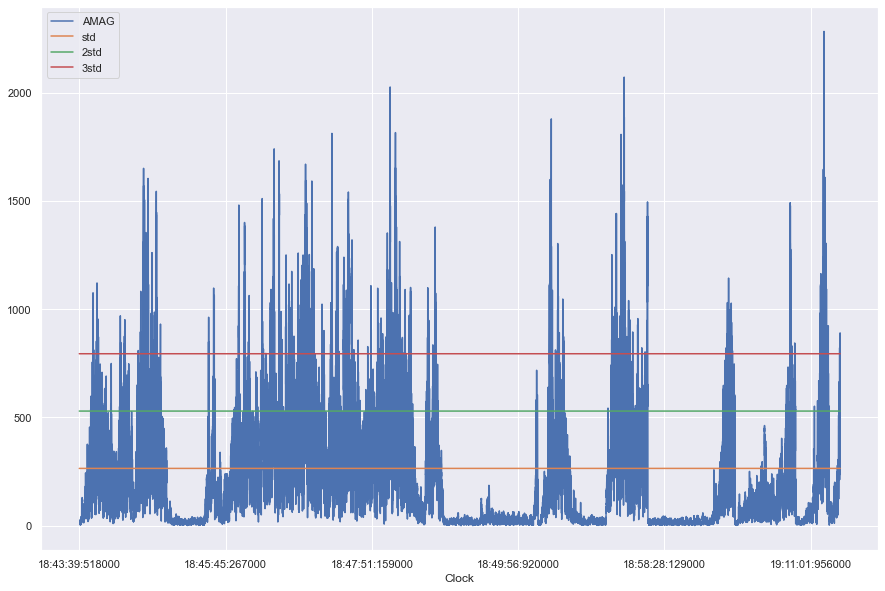

In [28]:
#plot AMAG
ax2 = hour_drive.plot(x = 'Clock', y = ['AMAG', 'std', '2std', '3std'])
plt.savefig('amag+sd.png')
plt.show()

In [23]:
plt.savefig('amag+sds.png')

<Figure size 1080x720 with 0 Axes>

In [15]:
#calculate std
hour_drive['std'] = hour_drive['AMAG'].std()
hour_drive

,timestamp (ms),acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,Speed(Km/h),seconds,Clock,SMA50AX,SMA50AY,SMA50AZ,SMA50GX,SMA50GY,SMA50GZ,AMAG,std
0,2019518,0,-64,-64,2.019,0.155,3.584,0.0,2019.518,18:43:39:518000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264.78128
1,2019530,-64,64,96,2.019,0.155,3.584,0.0,2019.530,18:43:39:530000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264.78128
2,2019542,256,32,-224,2.019,0.155,3.584,0.0,2019.542,18:43:39:542000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264.78128
3,2019555,-64,0,320,2.019,0.155,3.584,0.0,2019.555,18:43:39:555000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264.78128
4,2019567,64,128,0,2.019,0.155,3.584,0.0,2019.567,18:43:39:567000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264.78128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52006,4038485,-13216,-2176,416,-0.095,-0.015,0.061,13.6,4038.485,19:17:18:485000,-870.40,3.20,-188.16,-0.095,-0.015,0.061,890.511418,264.78128
52007,4038498,5408,-352,-10624,-0.095,-0.015,0.061,13.6,4038.498,19:17:18:498000,-734.08,32.00,-318.08,-0.095,-0.015,0.061,800.669927,264.78128
52008,4038510,5568,-480,-2912,-0.095,-0.015,0.061,13.6,4038.510,19:17:18:510000,-658.56,23.68,-186.88,-0.095,-0.015,0.061,684.971642,264.78128
52009,4038523,2368,1216,7168,-0.095,-0.015,0.061,13.6,4038.523,19:17:18:523000,-582.40,83.20,-91.52,-0.095,-0.015,0.061,595.388873,264.78128


In [17]:
#calculated 2std and 3 std
hour_drive['2std'] = hour_drive['AMAG'].std()*2
hour_drive
hour_drive['3std'] = hour_drive['AMAG'].std()*3
hour_drive

,timestamp (ms),acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,Speed(Km/h),seconds,Clock,SMA50AX,SMA50AY,SMA50AZ,SMA50GX,SMA50GY,SMA50GZ,AMAG,std,2std,3std
0,2019518,0,-64,-64,2.019,0.155,3.584,0.0,2019.518,18:43:39:518000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264.78128,529.562561,794.343841
1,2019530,-64,64,96,2.019,0.155,3.584,0.0,2019.530,18:43:39:530000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264.78128,529.562561,794.343841
2,2019542,256,32,-224,2.019,0.155,3.584,0.0,2019.542,18:43:39:542000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264.78128,529.562561,794.343841
3,2019555,-64,0,320,2.019,0.155,3.584,0.0,2019.555,18:43:39:555000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264.78128,529.562561,794.343841
4,2019567,64,128,0,2.019,0.155,3.584,0.0,2019.567,18:43:39:567000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264.78128,529.562561,794.343841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52006,4038485,-13216,-2176,416,-0.095,-0.015,0.061,13.6,4038.485,19:17:18:485000,-870.40,3.20,-188.16,-0.095,-0.015,0.061,890.511418,264.78128,529.562561,794.343841
52007,4038498,5408,-352,-10624,-0.095,-0.015,0.061,13.6,4038.498,19:17:18:498000,-734.08,32.00,-318.08,-0.095,-0.015,0.061,800.669927,264.78128,529.562561,794.343841
52008,4038510,5568,-480,-2912,-0.095,-0.015,0.061,13.6,4038.510,19:17:18:510000,-658.56,23.68,-186.88,-0.095,-0.015,0.061,684.971642,264.78128,529.562561,794.343841
52009,4038523,2368,1216,7168,-0.095,-0.015,0.061,13.6,4038.523,19:17:18:523000,-582.40,83.20,-91.52,-0.095,-0.015,0.061,595.388873,264.78128,529.562561,794.343841


In [ ]:
#####
####
#####

#takes a lot of time to compute, not seen a graph yet


#######
#####
####
#fig, ax = plt.subplots()
ax.plot(hour_drive['Clock'], hour_drive['AMAG'])
ax.plot(hour_drive['Clock'], hour_drive['std'])
plt.show()

In [ ]:
#another try at visualisations
#x = hour_drive['Clock']
#y = hour_drive['std']
#y2 = hour_drive['2std']
#y3 = hour_drive['3std']

In [ ]:
#still cannot make the graph
#fig, ax = plt.subplots()
#ax.plot(x, y)
#ax.plot(x, y)
#ax.plot(x, y2)
#ax.plot(x, y3)
#plt.show()

In [ ]:
#executes but doesnt show
#ax.plot(x, y)
#plt.show()

In [19]:
#make list of columns
cols = list(hour_drive.columns.values)
cols

['timestamp (ms)',
 'acc_x',
 'acc_y',
 'acc_z',
 'gyro_x',
 'gyro_y',
 'gyro_z',
 'Speed(Km/h)',
 'seconds',
 'Clock',
 'SMA50AX',
 'SMA50AY',
 'SMA50AZ',
 'SMA50GX',
 'SMA50GY',
 'SMA50GZ',
 'AMAG',
 'std',
 '2std',
 '3std']

In [20]:
#reorder columns
hour_drive = hour_drive[['timestamp (ms)',
 'acc_x',
 'acc_y',
 'acc_z',
 'gyro_x',
 'gyro_y',
 'gyro_z',
 'Speed(Km/h)',
 'seconds',
 'Clock',
 'SMA50AX',
 'SMA50AY',
 'SMA50AZ',
 'AMAG',
 'std',
 '2std',
 '3std',
 'SMA50GX',
 'SMA50GY',
 'SMA50GZ',]]

In [21]:
hour_drive

,timestamp (ms),acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,Speed(Km/h),seconds,Clock,SMA50AX,SMA50AY,SMA50AZ,AMAG,std,2std,3std,SMA50GX,SMA50GY,SMA50GZ
0,2019518,0,-64,-64,2.019,0.155,3.584,0.0,2019.518,18:43:39:518000,NaN,NaN,NaN,NaN,264.78128,529.562561,794.343841,NaN,NaN,NaN
1,2019530,-64,64,96,2.019,0.155,3.584,0.0,2019.530,18:43:39:530000,NaN,NaN,NaN,NaN,264.78128,529.562561,794.343841,NaN,NaN,NaN
2,2019542,256,32,-224,2.019,0.155,3.584,0.0,2019.542,18:43:39:542000,NaN,NaN,NaN,NaN,264.78128,529.562561,794.343841,NaN,NaN,NaN
3,2019555,-64,0,320,2.019,0.155,3.584,0.0,2019.555,18:43:39:555000,NaN,NaN,NaN,NaN,264.78128,529.562561,794.343841,NaN,NaN,NaN
4,2019567,64,128,0,2.019,0.155,3.584,0.0,2019.567,18:43:39:567000,NaN,NaN,NaN,NaN,264.78128,529.562561,794.343841,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52006,4038485,-13216,-2176,416,-0.095,-0.015,0.061,13.6,4038.485,19:17:18:485000,-870.40,3.20,-188.16,890.511418,264.78128,529.562561,794.343841,-0.095,-0.015,0.061
52007,4038498,5408,-352,-10624,-0.095,-0.015,0.061,13.6,4038.498,19:17:18:498000,-734.08,32.00,-318.08,800.669927,264.78128,529.562561,794.343841,-0.095,-0.015,0.061
52008,4038510,5568,-480,-2912,-0.095,-0.015,0.061,13.6,4038.510,19:17:18:510000,-658.56,23.68,-186.88,684.971642,264.78128,529.562561,794.343841,-0.095,-0.015,0.061
52009,4038523,2368,1216,7168,-0.095,-0.015,0.061,13.6,4038.523,19:17:18:523000,-582.40,83.20,-91.52,595.388873,264.78128,529.562561,794.343841,-0.095,-0.015,0.061


In [22]:
hour_drive.to_csv('hour_drive_rolling.csv')

# Manipulation of all_data(events)

In [23]:
#load csv
all_data = pd.read_csv('all_data.csv')
all_data

,Unnamed: 0,Unnamed: 0.1,Timestamp,AX,AY,AZ,fAX,fAY,fAZ,Amag,UL
0,0,0.0,18:10:09:027,352,-1120,-1088,-44.076183,55.046425,-97.609222,120.417520,579.6
1,1,1.0,18:10:09:118,928,32,768,-35.793819,54.783489,-92.298302,113.143293,579.6
2,2,2.0,18:10:09:204,-8512,14016,5888,-108.783569,212.341125,-55.202663,244.887632,579.6
3,3,3.0,18:10:09:295,2624,15424,-4928,-81.536301,428.819519,-88.810295,445.445414,579.6
4,4,5.0,18:10:09:384,96,512,960,-79.688850,430.335266,-80.931335,445.071494,579.6
...,...,...,...,...,...,...,...,...,...,...,...
1147,534,561.0,18:18:48:730,32,0,64,-12.116271,3.366579,-0.118162,12.575843,235.3
1148,535,562.0,18:18:48:819,0,32,0,-12.059914,3.493540,-0.117621,12.556281,235.3
1149,536,563.0,18:18:48:909,-32,-96,32,-12.152256,3.054081,0.028960,12.530187,235.3
1150,537,564.0,18:18:49:003,96,32,128,-11.653515,3.181624,0.610724,12.095459,235.3


In [24]:
#drop columns
all_data = all_data.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'])
all_data

,Timestamp,AX,AY,AZ,fAX,fAY,fAZ,Amag,UL
0,18:10:09:027,352,-1120,-1088,-44.076183,55.046425,-97.609222,120.417520,579.6
1,18:10:09:118,928,32,768,-35.793819,54.783489,-92.298302,113.143293,579.6
2,18:10:09:204,-8512,14016,5888,-108.783569,212.341125,-55.202663,244.887632,579.6
3,18:10:09:295,2624,15424,-4928,-81.536301,428.819519,-88.810295,445.445414,579.6
4,18:10:09:384,96,512,960,-79.688850,430.335266,-80.931335,445.071494,579.6
...,...,...,...,...,...,...,...,...,...
1147,18:18:48:730,32,0,64,-12.116271,3.366579,-0.118162,12.575843,235.3
1148,18:18:48:819,0,32,0,-12.059914,3.493540,-0.117621,12.556281,235.3
1149,18:18:48:909,-32,-96,32,-12.152256,3.054081,0.028960,12.530187,235.3
1150,18:18:49:003,96,32,128,-11.653515,3.181624,0.610724,12.095459,235.3


In [26]:
#info
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  1152 non-null   object 
 1   AX         1152 non-null   int64  
 2   AY         1152 non-null   int64  
 3   AZ         1152 non-null   int64  
 4   fAX        1152 non-null   float64
 5   fAY        1152 non-null   float64
 6   fAZ        1152 non-null   float64
 7   Amag       1152 non-null   float64
 8   UL         1152 non-null   float64
dtypes: float64(5), int64(3), object(1)
memory usage: 81.1+ KB


In [27]:
#tranform column to datetime 
all_data['Timestamp'] = pd.to_datetime(all_data['Timestamp'], format = '%H:%M:%S:%f')

In [28]:
#check if transformed
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  1152 non-null   datetime64[ns]
 1   AX         1152 non-null   int64         
 2   AY         1152 non-null   int64         
 3   AZ         1152 non-null   int64         
 4   fAX        1152 non-null   float64       
 5   fAY        1152 non-null   float64       
 6   fAZ        1152 non-null   float64       
 7   Amag       1152 non-null   float64       
 8   UL         1152 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(3)
memory usage: 81.1 KB


In [29]:
#create rolling avg for AX AY AZ
all_data['SMA50AX'] = all_data['AX'].rolling(50).mean()
all_data['SMA50AY'] = all_data['AY'].rolling(50).mean()
all_data['SMA50AZ'] = all_data['AZ'].rolling(50).mean()

In [ ]:
#all_data = all_data.drop(columns=['SMA200AX', 'SMA200AY', 'SMA200AZ'])

In [30]:
#keep only time - no date
all_data['Timestamp'] = all_data['Timestamp'].dt.strftime('%H:%M:%S:%f')

In [31]:
all_data

,Timestamp,AX,AY,AZ,fAX,fAY,fAZ,Amag,UL,SMA50AX,SMA50AY,SMA50AZ
0,18:10:09:027000,352,-1120,-1088,-44.076183,55.046425,-97.609222,120.417520,579.6,NaN,NaN,NaN
1,18:10:09:118000,928,32,768,-35.793819,54.783489,-92.298302,113.143293,579.6,NaN,NaN,NaN
2,18:10:09:204000,-8512,14016,5888,-108.783569,212.341125,-55.202663,244.887632,579.6,NaN,NaN,NaN
3,18:10:09:295000,2624,15424,-4928,-81.536301,428.819519,-88.810295,445.445414,579.6,NaN,NaN,NaN
4,18:10:09:384000,96,512,960,-79.688850,430.335266,-80.931335,445.071494,579.6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1147,18:18:48:730000,32,0,64,-12.116271,3.366579,-0.118162,12.575843,235.3,48.00,5.76,-20.48
1148,18:18:48:819000,0,32,0,-12.059914,3.493540,-0.117621,12.556281,235.3,48.64,5.12,-19.20
1149,18:18:48:909000,-32,-96,32,-12.152256,3.054081,0.028960,12.530187,235.3,48.64,3.84,-17.28
1150,18:18:49:003000,96,32,128,-11.653515,3.181624,0.610724,12.095459,235.3,51.20,6.40,-15.36


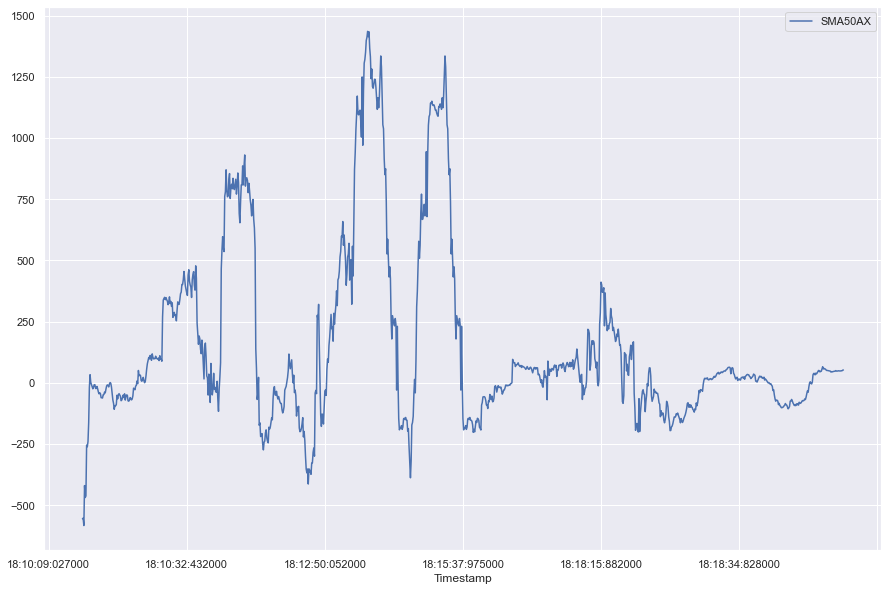

In [32]:
#look at SMA50AX
all_data.plot(x = 'Timestamp', y = 'SMA50AX')
plt.show()

In [33]:
#Calculate AMAG
all_data['AMAG'] = (all_data['SMA50AX']**2 + all_data['SMA50AY']**2 + all_data['SMA50AZ']**2)**0.5
all_data

,Timestamp,AX,AY,AZ,fAX,fAY,fAZ,Amag,UL,SMA50AX,SMA50AY,SMA50AZ,AMAG
0,18:10:09:027000,352,-1120,-1088,-44.076183,55.046425,-97.609222,120.417520,579.6,NaN,NaN,NaN,NaN
1,18:10:09:118000,928,32,768,-35.793819,54.783489,-92.298302,113.143293,579.6,NaN,NaN,NaN,NaN
2,18:10:09:204000,-8512,14016,5888,-108.783569,212.341125,-55.202663,244.887632,579.6,NaN,NaN,NaN,NaN
3,18:10:09:295000,2624,15424,-4928,-81.536301,428.819519,-88.810295,445.445414,579.6,NaN,NaN,NaN,NaN
4,18:10:09:384000,96,512,960,-79.688850,430.335266,-80.931335,445.071494,579.6,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,18:18:48:730000,32,0,64,-12.116271,3.366579,-0.118162,12.575843,235.3,48.00,5.76,-20.48,52.503409
1148,18:18:48:819000,0,32,0,-12.059914,3.493540,-0.117621,12.556281,235.3,48.64,5.12,-19.20,52.542402
1149,18:18:48:909000,-32,-96,32,-12.152256,3.054081,0.028960,12.530187,235.3,48.64,3.84,-17.28,51.760927
1150,18:18:49:003000,96,32,128,-11.653515,3.181624,0.610724,12.095459,235.3,51.20,6.40,-15.36,53.836137


In [34]:
#calculate std, 2std and 3std for amag
all_data['std'] = all_data['AMAG'].std()
all_data['2std'] = all_data['AMAG'].std()*2
all_data['3std'] = all_data['AMAG'].std()*3
all_data

,Timestamp,AX,AY,AZ,fAX,fAY,fAZ,Amag,UL,SMA50AX,SMA50AY,SMA50AZ,AMAG,std,2std,3std
0,18:10:09:027000,352,-1120,-1088,-44.076183,55.046425,-97.609222,120.417520,579.6,NaN,NaN,NaN,NaN,395.258988,790.517976,1185.776964
1,18:10:09:118000,928,32,768,-35.793819,54.783489,-92.298302,113.143293,579.6,NaN,NaN,NaN,NaN,395.258988,790.517976,1185.776964
2,18:10:09:204000,-8512,14016,5888,-108.783569,212.341125,-55.202663,244.887632,579.6,NaN,NaN,NaN,NaN,395.258988,790.517976,1185.776964
3,18:10:09:295000,2624,15424,-4928,-81.536301,428.819519,-88.810295,445.445414,579.6,NaN,NaN,NaN,NaN,395.258988,790.517976,1185.776964
4,18:10:09:384000,96,512,960,-79.688850,430.335266,-80.931335,445.071494,579.6,NaN,NaN,NaN,NaN,395.258988,790.517976,1185.776964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,18:18:48:730000,32,0,64,-12.116271,3.366579,-0.118162,12.575843,235.3,48.00,5.76,-20.48,52.503409,395.258988,790.517976,1185.776964
1148,18:18:48:819000,0,32,0,-12.059914,3.493540,-0.117621,12.556281,235.3,48.64,5.12,-19.20,52.542402,395.258988,790.517976,1185.776964
1149,18:18:48:909000,-32,-96,32,-12.152256,3.054081,0.028960,12.530187,235.3,48.64,3.84,-17.28,51.760927,395.258988,790.517976,1185.776964
1150,18:18:49:003000,96,32,128,-11.653515,3.181624,0.610724,12.095459,235.3,51.20,6.40,-15.36,53.836137,395.258988,790.517976,1185.776964


In [35]:
all_data.to_csv('all_data_rolling.csv')

# ACCEL 1&2 

In [36]:
#load csvs
accel_1 = pd.read_csv('accel_1.csv')
accel_2 = pd.read_csv('accel_2.csv')

In [37]:
#append csvs
both_accel = accel_1.append(accel_2)

In [38]:
#check result
both_accel

,Time,X,Y,Z,X_f,Y_f,Z_f,Amag,UL
0,2918276,0,-32,0,1.068721,-0.504631,-0.231132,1.204259,84.08
1,2918374,0,64,64,1.067315,-0.442127,-0.089711,1.158743,84.08
2,2918471,64,-32,32,1.150048,-0.472716,-0.019123,1.243558,84.08
3,2918569,-32,160,-96,1.106470,-0.317224,-0.229926,1.173786,84.08
4,2918666,-32,-32,0,1.062978,-0.347992,-0.229421,1.141777,84.08
...,...,...,...,...,...,...,...,...,...
257,3033658,0,-32,64,-39.390537,6.099705,-135.872971,141.599029,116.84
258,3033755,-128,-32,-32,-39.715687,5.994855,-135.206390,141.046241,116.84
259,3033853,-32,-32,-32,-39.687428,5.890501,-134.546951,140.401823,116.84
260,3033950,-32,-64,0,-39.659370,5.698927,-133.690964,139.565817,116.84


In [39]:
#transform ms into s 
both_accel['seconds'] = both_accel['Time']*0.001
both_accel

,Time,X,Y,Z,X_f,Y_f,Z_f,Amag,UL,seconds
0,2918276,0,-32,0,1.068721,-0.504631,-0.231132,1.204259,84.08,2918.276
1,2918374,0,64,64,1.067315,-0.442127,-0.089711,1.158743,84.08,2918.374
2,2918471,64,-32,32,1.150048,-0.472716,-0.019123,1.243558,84.08,2918.471
3,2918569,-32,160,-96,1.106470,-0.317224,-0.229926,1.173786,84.08,2918.569
4,2918666,-32,-32,0,1.062978,-0.347992,-0.229421,1.141777,84.08,2918.666
...,...,...,...,...,...,...,...,...,...,...
257,3033658,0,-32,64,-39.390537,6.099705,-135.872971,141.599029,116.84,3033.658
258,3033755,-128,-32,-32,-39.715687,5.994855,-135.206390,141.046241,116.84,3033.755
259,3033853,-32,-32,-32,-39.687428,5.890501,-134.546951,140.401823,116.84,3033.853
260,3033950,-32,-64,0,-39.659370,5.698927,-133.690964,139.565817,116.84,3033.950


In [40]:
#create a clock with ms and timedelta
start_time_1 = pd.to_datetime('30/3/2022 18:00:00')
new_datetime = start_time_1 + pd.to_timedelta(both_accel['seconds'], unit = 's')
both_accel['Clock'] = new_datetime
both_accel

,Time,X,Y,Z,X_f,Y_f,Z_f,Amag,UL,seconds,Clock
0,2918276,0,-32,0,1.068721,-0.504631,-0.231132,1.204259,84.08,2918.276,2022-03-30 18:48:38.276
1,2918374,0,64,64,1.067315,-0.442127,-0.089711,1.158743,84.08,2918.374,2022-03-30 18:48:38.374
2,2918471,64,-32,32,1.150048,-0.472716,-0.019123,1.243558,84.08,2918.471,2022-03-30 18:48:38.471
3,2918569,-32,160,-96,1.106470,-0.317224,-0.229926,1.173786,84.08,2918.569,2022-03-30 18:48:38.569
4,2918666,-32,-32,0,1.062978,-0.347992,-0.229421,1.141777,84.08,2918.666,2022-03-30 18:48:38.666
...,...,...,...,...,...,...,...,...,...,...,...
257,3033658,0,-32,64,-39.390537,6.099705,-135.872971,141.599029,116.84,3033.658,2022-03-30 18:50:33.658
258,3033755,-128,-32,-32,-39.715687,5.994855,-135.206390,141.046241,116.84,3033.755,2022-03-30 18:50:33.755
259,3033853,-32,-32,-32,-39.687428,5.890501,-134.546951,140.401823,116.84,3033.853,2022-03-30 18:50:33.853
260,3033950,-32,-64,0,-39.659370,5.698927,-133.690964,139.565817,116.84,3033.950,2022-03-30 18:50:33.950


In [41]:
#remove date, only time
both_accel['Clock'] = new_datetime.dt.strftime('%H:%M:%S:%f')

In [42]:
#check result
both_accel

,Time,X,Y,Z,X_f,Y_f,Z_f,Amag,UL,seconds,Clock
0,2918276,0,-32,0,1.068721,-0.504631,-0.231132,1.204259,84.08,2918.276,18:48:38:276000
1,2918374,0,64,64,1.067315,-0.442127,-0.089711,1.158743,84.08,2918.374,18:48:38:374000
2,2918471,64,-32,32,1.150048,-0.472716,-0.019123,1.243558,84.08,2918.471,18:48:38:471000
3,2918569,-32,160,-96,1.106470,-0.317224,-0.229926,1.173786,84.08,2918.569,18:48:38:569000
4,2918666,-32,-32,0,1.062978,-0.347992,-0.229421,1.141777,84.08,2918.666,18:48:38:666000
...,...,...,...,...,...,...,...,...,...,...,...
257,3033658,0,-32,64,-39.390537,6.099705,-135.872971,141.599029,116.84,3033.658,18:50:33:658000
258,3033755,-128,-32,-32,-39.715687,5.994855,-135.206390,141.046241,116.84,3033.755,18:50:33:755000
259,3033853,-32,-32,-32,-39.687428,5.890501,-134.546951,140.401823,116.84,3033.853,18:50:33:853000
260,3033950,-32,-64,0,-39.659370,5.698927,-133.690964,139.565817,116.84,3033.950,18:50:33:950000


In [43]:
#create rolling avg for X Y Z
both_accel['SMA50AX'] = both_accel['X'].rolling(50).mean()
both_accel['SMA50AY'] = both_accel['Y'].rolling(50).mean()
both_accel['SMA50AZ'] = both_accel['Z'].rolling(50).mean()
both_accel

,Time,X,Y,Z,X_f,Y_f,Z_f,Amag,UL,seconds,Clock,SMA50AX,SMA50AY,SMA50AZ
0,2918276,0,-32,0,1.068721,-0.504631,-0.231132,1.204259,84.08,2918.276,18:48:38:276000,NaN,NaN,NaN
1,2918374,0,64,64,1.067315,-0.442127,-0.089711,1.158743,84.08,2918.374,18:48:38:374000,NaN,NaN,NaN
2,2918471,64,-32,32,1.150048,-0.472716,-0.019123,1.243558,84.08,2918.471,18:48:38:471000,NaN,NaN,NaN
3,2918569,-32,160,-96,1.106470,-0.317224,-0.229926,1.173786,84.08,2918.569,18:48:38:569000,NaN,NaN,NaN
4,2918666,-32,-32,0,1.062978,-0.347992,-0.229421,1.141777,84.08,2918.666,18:48:38:666000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,3033658,0,-32,64,-39.390537,6.099705,-135.872971,141.599029,116.84,3033.658,18:50:33:658000,-51.84,126.08,-234.88
258,3033755,-128,-32,-32,-39.715687,5.994855,-135.206390,141.046241,116.84,3033.755,18:50:33:755000,-43.52,123.52,-232.32
259,3033853,-32,-32,-32,-39.687428,5.890501,-134.546951,140.401823,116.84,3033.853,18:50:33:853000,-40.96,122.88,-227.20
260,3033950,-32,-64,0,-39.659370,5.698927,-133.690964,139.565817,116.84,3033.950,18:50:33:950000,-39.68,124.16,-232.32


In [44]:
#Calculate AMAG
both_accel['AMAG'] = (both_accel['SMA50AX']**2 + both_accel['SMA50AY']**2 + both_accel['SMA50AZ']**2)**0.5
both_accel

,Time,X,Y,Z,X_f,Y_f,Z_f,Amag,UL,seconds,Clock,SMA50AX,SMA50AY,SMA50AZ,AMAG
0,2918276,0,-32,0,1.068721,-0.504631,-0.231132,1.204259,84.08,2918.276,18:48:38:276000,NaN,NaN,NaN,NaN
1,2918374,0,64,64,1.067315,-0.442127,-0.089711,1.158743,84.08,2918.374,18:48:38:374000,NaN,NaN,NaN,NaN
2,2918471,64,-32,32,1.150048,-0.472716,-0.019123,1.243558,84.08,2918.471,18:48:38:471000,NaN,NaN,NaN,NaN
3,2918569,-32,160,-96,1.106470,-0.317224,-0.229926,1.173786,84.08,2918.569,18:48:38:569000,NaN,NaN,NaN,NaN
4,2918666,-32,-32,0,1.062978,-0.347992,-0.229421,1.141777,84.08,2918.666,18:48:38:666000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,3033658,0,-32,64,-39.390537,6.099705,-135.872971,141.599029,116.84,3033.658,18:50:33:658000,-51.84,126.08,-234.88,271.573501
258,3033755,-128,-32,-32,-39.715687,5.994855,-135.206390,141.046241,116.84,3033.755,18:50:33:755000,-43.52,123.52,-232.32,266.690388
259,3033853,-32,-32,-32,-39.687428,5.890501,-134.546951,140.401823,116.84,3033.853,18:50:33:853000,-40.96,122.88,-227.20,261.528308
260,3033950,-32,-64,0,-39.659370,5.698927,-133.690964,139.565817,116.84,3033.950,18:50:33:950000,-39.68,124.16,-232.32,266.388420


In [45]:
#calculate std, 2std and 3 std for AMAG
both_accel['std'] = both_accel['AMAG'].std()
both_accel['2std'] = both_accel['AMAG'].std()*2
both_accel['3std'] = both_accel['AMAG'].std()*3
both_accel

,Time,X,Y,Z,X_f,Y_f,Z_f,Amag,UL,seconds,Clock,SMA50AX,SMA50AY,SMA50AZ,AMAG,std,2std,3std
0,2918276,0,-32,0,1.068721,-0.504631,-0.231132,1.204259,84.08,2918.276,18:48:38:276000,NaN,NaN,NaN,NaN,245.48338,490.96676,736.450139
1,2918374,0,64,64,1.067315,-0.442127,-0.089711,1.158743,84.08,2918.374,18:48:38:374000,NaN,NaN,NaN,NaN,245.48338,490.96676,736.450139
2,2918471,64,-32,32,1.150048,-0.472716,-0.019123,1.243558,84.08,2918.471,18:48:38:471000,NaN,NaN,NaN,NaN,245.48338,490.96676,736.450139
3,2918569,-32,160,-96,1.106470,-0.317224,-0.229926,1.173786,84.08,2918.569,18:48:38:569000,NaN,NaN,NaN,NaN,245.48338,490.96676,736.450139
4,2918666,-32,-32,0,1.062978,-0.347992,-0.229421,1.141777,84.08,2918.666,18:48:38:666000,NaN,NaN,NaN,NaN,245.48338,490.96676,736.450139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,3033658,0,-32,64,-39.390537,6.099705,-135.872971,141.599029,116.84,3033.658,18:50:33:658000,-51.84,126.08,-234.88,271.573501,245.48338,490.96676,736.450139
258,3033755,-128,-32,-32,-39.715687,5.994855,-135.206390,141.046241,116.84,3033.755,18:50:33:755000,-43.52,123.52,-232.32,266.690388,245.48338,490.96676,736.450139
259,3033853,-32,-32,-32,-39.687428,5.890501,-134.546951,140.401823,116.84,3033.853,18:50:33:853000,-40.96,122.88,-227.20,261.528308,245.48338,490.96676,736.450139
260,3033950,-32,-64,0,-39.659370,5.698927,-133.690964,139.565817,116.84,3033.950,18:50:33:950000,-39.68,124.16,-232.32,266.388420,245.48338,490.96676,736.450139


In [46]:
both_accel.to_csv('both_accel_rolling.csv')

In [ ]:
###########

In [ ]:
##########

In [ ]:
#########

In [ ]:
#############

In [ ]:
##############

In [60]:
hour_drive

,timestamp (ms),acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,Speed(Km/h),seconds,Clock,SMA50AX,SMA50AY,SMA50AZ,AMAG,std,2std,3std,SMA50GX,SMA50GY,SMA50GZ
0,2019518,0,-64,-64,2.019,0.155,3.584,0.0,2019.518,18:43:39:518000,NaN,NaN,NaN,NaN,264.78128,529.562561,794.343841,NaN,NaN,NaN
1,2019530,-64,64,96,2.019,0.155,3.584,0.0,2019.530,18:43:39:530000,NaN,NaN,NaN,NaN,264.78128,529.562561,794.343841,NaN,NaN,NaN
2,2019542,256,32,-224,2.019,0.155,3.584,0.0,2019.542,18:43:39:542000,NaN,NaN,NaN,NaN,264.78128,529.562561,794.343841,NaN,NaN,NaN
3,2019555,-64,0,320,2.019,0.155,3.584,0.0,2019.555,18:43:39:555000,NaN,NaN,NaN,NaN,264.78128,529.562561,794.343841,NaN,NaN,NaN
4,2019567,64,128,0,2.019,0.155,3.584,0.0,2019.567,18:43:39:567000,NaN,NaN,NaN,NaN,264.78128,529.562561,794.343841,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52006,4038485,-13216,-2176,416,-0.095,-0.015,0.061,13.6,4038.485,19:17:18:485000,-870.40,3.20,-188.16,890.511418,264.78128,529.562561,794.343841,-0.095,-0.015,0.061
52007,4038498,5408,-352,-10624,-0.095,-0.015,0.061,13.6,4038.498,19:17:18:498000,-734.08,32.00,-318.08,800.669927,264.78128,529.562561,794.343841,-0.095,-0.015,0.061
52008,4038510,5568,-480,-2912,-0.095,-0.015,0.061,13.6,4038.510,19:17:18:510000,-658.56,23.68,-186.88,684.971642,264.78128,529.562561,794.343841,-0.095,-0.015,0.061
52009,4038523,2368,1216,7168,-0.095,-0.015,0.061,13.6,4038.523,19:17:18:523000,-582.40,83.20,-91.52,595.388873,264.78128,529.562561,794.343841,-0.095,-0.015,0.061


In [ ]:
cleaned[(cleaned['CBF_01']==1) & (cleaned['CBF_01']==2)]

In [48]:
score = 0

In [92]:
####def Rough_rider_score(self):
    #if hour_drive[(hour_drive['AMAG'] > hour_drive['3std']) & (hour_drive['AMAG'] > hour_drive['2std']) & (hour_drive['AMAG'] > hour_drive['std'])]:
     #   score += 3
      #  if hour_drive[(hour_drive['AMAG'] > hour_drive['2std']) & (hour_drive['AMAG'] < hour_drive['std'])]:
       #     score += 2 
        #    if hour_drive[(hour_drive['AMAG'] > hour_drive['std'])]:
         #       score == score + 1
          #  else:
           #     score == score + 0
            #return score

In [ ]:
#Rough_rider_score(hour_drive)

In [73]:
#def Rough_rider_score(self):
    #if (hour_drive['AMAG'] > hour_drive['3std']) and (hour_drive['AMAG']>hour_drive['2std']) and (hour_drive['AMAG']>hour_drive['std']):
        #score += 3
        #if (hour_drive['AMAG']>hour_drive['2std']) and (hour_drive['AMAG']>hour_drive['std']):
            #score+=2
            #if (hour_drive['AMAG']>hour_drive['std']):
               # score += 1
            #return
#print(score)

0


In [ ]:
#def function(scores):
    #if scores >= 95 and scores <=100:
      #  return "A"
    #elif scores >= 80 and scores <=94:
    #    return "B"
    #elif scores >= 70 and scores <=79:
        #return "C"